## REDES NEURAIS ARTIFICIAIS  
### Multilayer Perceptron aplicada ao problema XOR

In [1]:
#importacao
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#secante hiperbolica ao quadrado (sech) ao quadrado (inversa da tgh)
def sech2(u):
    return 1 / np.cosh(u)**2

In [3]:
#gerando o dataset
x = np.array([[0,0], [0,1], [1,0], [1,1]]) #entradas - corresponde as entradas i2 e i3 (x1 e x2)
y = np.array([[-1,1], [1,-1], [1,-1], [-1,1]]) #saida esperada - corresponde as saidas i9 e i10(y1 e y2)
print(x)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[-1  1]
 [ 1 -1]
 [ 1 -1]
 [-1  1]]


In [4]:
#criar o bias
i1 = 1
i5 = 1
i4 = 1
i8 = 1

In [5]:
#inicializando as matrizes Wji (12 pesos ao todo)
w61 = np.random.uniform() - 0.5 #bias
w62 = np.random.uniform() - 0.5 #i1 (x1)
w63 = np.random.uniform() - 0.5 #i2 (x2)

w72 = np.random.uniform() - 0.5
w73 = np.random.uniform() - 0.5
w74 = np.random.uniform() - 0.5 #bias

w95 = np.random.uniform() - 0.5 #bias
w96 = np.random.uniform() - 0.5
w97 = np.random.uniform() - 0.5

w106 = np.random.uniform() - 0.5
w107 = np.random.uniform() - 0.5
w108 = np.random.uniform() - 0.5 #bias


In [6]:
#definicao de parametros
contador_epocas = 0
tol = 0 #so para de rodar quanto acerta todas as amostras
erro_epoca_atual = tol + 1
n_amostras = 4
max_epocas = 10000
eta = 0.01
erro_epocas = np.zeros(max_epocas)

In [7]:
#treinamento da MLP

while (contador_epocas < max_epocas) and (erro_epoca_atual > tol):

    #exibe progresso a cada 10 epocas
    # if contador_epocas % 10 == 0:
    #     print(f"epoca: {contador_epocas}")

    #reseta o erro acumulado da epoca
    erro = 0

    #embaralha indices para apresentacao das amostras
    indices_embaralhados = np.random.permutation(n_amostras)


    for i in range(n_amostras):
        #seleciona um indice
        indice_selecionado = indices_embaralhados[i]

        #obter o conjunto de entrada x e sua respectiva saida y
        xi = x[indice_selecionado]
        yi = y[indice_selecionado]

        #separa componentes da entrada
        i2 = xi[0]
        i3 = xi[1]

        #separa componentes da saida
        y9 = yi[0]
        y10 = yi[1]


        # *** FASE FORWARD ***
        #calcula ativacao do neuronio 1 da camada 1
        u6 = (i1*w61) + (i2*w62) + (i3*w63)
        i6 = np.tanh(u6)


        #calcula ativacao do neurionio 2 da camada 1
        u7 = (i2*w72) + (i3*w73) + (i4*w74)
        i7 = np.tanh(u7)

        #calcula ativacao do neurionio 1 da camada 2
        u9 = (i5*w95) + (i6*w96) + (i7*w97)
        i9 = np.tanh(u9)


        #calcula ativacao do neurionio 2 da camada 2
        u10 = (i6*w106) + (i7*w107) + (i8*w108)
        i10 = np.tanh(u10)

        
        # *** FASE BACKWARD - BACKPROPAGATION ***
        #calculo dos erros na saida
        e9 = y9 - i9 #erro neuronio 9
        e10 = y10 - i10 #erro neurionio 10

        #--- ATUALIZACAO DE PESOS DA CAMADA 2
        #neuronio 1 da camada 2
        #pesos ligados ao neuronio 1 da camada 2
        #calcula o gradiente do neuronio 1 da camada 2
        deltinha9 = e9*sech2(u9)

        #calcula ajustes dos pesos do neuronio 1 da camada 2
        deltaw95 = eta * deltinha9 * i5
        deltaw96 = eta * deltinha9 * i6
        deltaw97 = eta * deltinha9 * i7

        #atualizacao dos pesos ligados ao neuronio 1 da camada 2
        w95 += deltaw95
        w96 += deltaw96
        w97 += deltaw97

        #neuronio 2 da camada 2
        #pesos ligados ao neuronio 2 da camada 2
        #calcula o gradiente do neuronio 2 da camada 2
        deltinha10 = e10*sech2(u10)

        #calcula ajustes dos pesos do neuronio 2 da camada 2
        deltaw106 = eta * deltinha10 * i6
        deltaw107 = eta * deltinha10 * i7
        deltaw108 = eta * deltinha10 * i8

        #atualizacao dos pesos ligados ao neuronio 2 da camada 2
        w106 += deltaw106
        w107 += deltaw107
        w108 += deltaw108


        #ATUALIZACAO DOS PESOS DA CAMADA 1
        #neuronio 1 da camada 1
        #pesos ligados ao neuronio 1 da camada 1
        #calcula o gradiente do neuronio 1 da camada 1
        deltinha6 = sech2(u6) * ((deltinha9 * w96) + deltinha10*w106)

        #calcula ajustes dos pesos do neuronio 1 da camada 1
        deltaw61 = eta * deltinha6 * i1
        deltaw62 = eta * deltinha6 * i2
        deltaw63 = eta * deltinha6 * i3

        #atualiza os pesos do neuronio 1 da camada 1
        w61 += deltaw61
        w62 += deltaw62
        w63 += deltaw63

        #neuronio 2 da camada 1
        #pesos ligados ao neuronio 2 da camada 1
        #calcula o gradiente do neuronio 2 da camada 1
        deltinha7 = sech2(u7) * ((deltinha9 * w97) + (deltinha10 * w107))

        #calula ajustes dos pesos do neuronio 2 da camada 1
        deltaw72 = eta * deltinha7 * i2 
        deltaw73 = eta * deltinha7 * i3
        deltaw74 = eta * deltinha7 * i4
        
        #atualiza os pesos do neuronio 2 da camada 1
        w72 += deltaw72    
        w73 += deltaw73
        w74 += deltaw74

        #CALCULA O ERRO ACUMULADO
        erro += (np.power(e9, 2) + np.power(e10, 2))

    #calcula o erro medio da epoca
    erro_epoca_atual = erro / n_amostras

    #armazena no historico de erros
    erro_epocas[contador_epocas] = erro_epoca_atual

    #incrementa o contador de epocas
    contador_epocas += 1

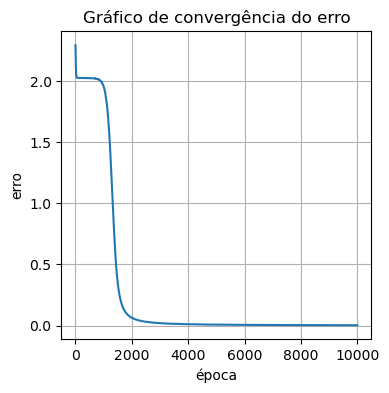

In [8]:
#plota o erro epoca a epoca
plt.figure(figsize=(4,4))
plt.plot(range(contador_epocas), erro_epocas[:contador_epocas])
plt.title("Gráfico de convergência do erro")
plt.xlabel('época')
plt.ylabel('erro')
plt.grid(True)
plt.show()

In [28]:
# print('Pesos w6: ', w61, w62, w63, '\nPesos w7: ',
#       w72, w73, w74, '\nPesos w10: ',
#       w106, w107, w108)

yhat_mat = np.zeros((4, 2)) #matriz prevista pre-alocada preenchida com zeros

# print(x) #entrada
# print(y) #saida
# print(yhat_mat)

#para cada amostra no dataset
for i in range(n_amostras):
    # print('Classificando a amostra: ', x[i])
    # print('Para essa amostra espera-se a saída: ', y[i])

    xi = x[i]
    i2 = xi[0]
    i3 = xi[1]


    yi = y[i]
    y9 = y[1]
    y10 = y[0]

    u6 = i1*w61 + i2*w62 + i3*w63
    i6 = np.tanh(u6)

    u7 = i2*w72 + i3*w73 + i4*w74
    i7 = np.tanh(u7)

    u9 = i5*w95 + i6*w96 + i7*w97
    i9 = np.tanh(u9)

    u10 = i6*w106 + i7*w107 + i8*w108
    i10 = np.tanh(u10)

    yhat_mat[i, 0] = i9
    yhat_mat[i, 1] = i10

In [30]:
#resultado final
mat_final = np.column_stack([y, yhat_mat])#junta duas estruturas em colunas - criacao de colunas
print("\nx1\tx2\tyhat1\t\tyhat2")

for linha in mat_final:
    print(f"{linha[0]:.1f}\t{linha[1]:.1f}\t{linha[2]:.6f}\t{linha[3]:.6f}")


x1	x2	yhat1		yhat2
-1.0	1.0	-0.958797	0.958306
1.0	-1.0	0.967475	-0.967066
1.0	-1.0	0.967476	-0.967067
-1.0	1.0	-0.956050	0.955517
